In [37]:
%pylab inline
import numpy as np
from sklearn import datasets 

Populating the interactive namespace from numpy and matplotlib


In [38]:
class Linear(object):
    def __init__(self, n_in, n_out):
        self.W = np.random.randn(n_out, n_in)
        self.b = np.random.randn(n_out)
        
        self.input = np.zeros(n_in)
        self.output = np.zeros(n_out)
        
        self.gradInput = np.zeros_like(self.input)
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        self.input = input
        self.output = np.dot(self.W, input) + self.b
        return self.output
    
    def updateGradInput(self, gradOutput):
        self.gradInput = np.dot(self.W.T, gradOutput)
        return self.gradInput
    
    def updateGradWeight(self, gradOutput):
        self.gradW = np.outer(gradOutput, self.input)
        self.gradb = gradOutput
        self.gradWeight = self.gradW, self.gradb
        
        return self.gradWeight

In [39]:
class Sigmoid(object):
    def __init__(self, n_in):
        self.input = np.zeros(n_in)
        self.output = np.zeros(n_in)
        self.gradInput = np.zeros_like(self.input)
        
    def updateOutput(self, input):
        self.input = input
        self.output = 1.0 / (1.0 + np.exp(-input))
        return self.output
    
    def updateGradInput(self, gradOutput):
        self.gradInput = gradOutput * self.output * (1.0 - self.output)
        return self.gradInput
    
    def updateGradWeight(self, gradOutput):
        self.gradWeight = ()
        return self.gradWeight

In [40]:
class Softmax(object):
    def __init__(self, n_in):
        self.output = np.zeros(n_in)
    
    def updateOutput(self, input):
        mx = input.max()
        logsum = np.exp(-(mx - input)).sum()
        logsum = mx + log(logsum)
        self.output = input - logsum
        
        return self.output
    
    def updateGradInput(self, gradOutput):
        sm = gradOutput.sum()
        self.gradInput = gradOutput - np.exp(self.output) * sm
        return self.gradInput
    
    def updateGradWeight(self, gradOutput):
        self.gradWeight = ()
        return self.gradWeight

In [41]:
class MSELoss(object):
    def __init__(self, n_in):
        self.n_in = n_in
        self.output = 0.0
        self.input = np.zeros(n_in)
        
    def updateOutput(self, input, target):
        self.output = (1.0 / self.n_in) *np.sum((input - target)**2)
        return self.output
    
    def updateGradInput(self, input, target):
        self.gradInput = (2.0 / self.n_in) * (input - target)
        return self.gradInput

In [42]:
class NLLLoss(object):
    def __init__(self, n_in):
        self.n_in = n_in
        
    def updateOutput(self, input, target):
        self.output = -input[target]
        return self.output
    
    def updateGradInput(self, input, target):
        self.gradInput = np.zeros_like(input)
        self.gradInput[target] = -1.0
        return self.gradInput

In [43]:
class MLP(object):
    def __init__(self, n_in, n_out):
        self.modules = []
        self.input = np.zeros(n_in)
        self.output = np.zeros(n_out)
        self.gradInput = np.zeros_like(self.input)
        self.gradients = []
        
    def add(self, module):
        self.modules.append(module)
        
    def forward(self, input):
        self.input = input
        self.output = input
        for m in self.modules:
            self.output = m.updateOutput(self.output)
        return self.output
    
    def backward(self, gradOutput):
        for m in reversed(self.modules):
            self.gradients.insert(0, m.updateGradWeight(gradOutput))
            gradOutput = m.updateGradInput(gradOutput)
        return self.gradients
    
    def predict(self, input):
        out = self.forward(input).argmax()
        return out
        #if out <= 0.5:
        #    return 0
        #return 1

In [44]:
model = MLP(2, 1)
model.add(Linear(2,1000))
model.add(Sigmoid(1000))
model.add(Linear(1000,3))
model.add(Softmax(3))
criterion = NLLLoss(2)

model2 = MLP(2, 1)
model2.add(Linear(2,50))
model2.add(Sigmoid(50))
model2.add(Linear(50,3))
model2.add(Softmax(3))
criterion2 = NLLLoss(2)

model3 = MLP(2, 1)
model3.add(Linear(2,700))
model3.add(Sigmoid(700))
model3.add(Linear(700,3))
model3.add(Softmax(3))
criterion3 = NLLLoss(2)

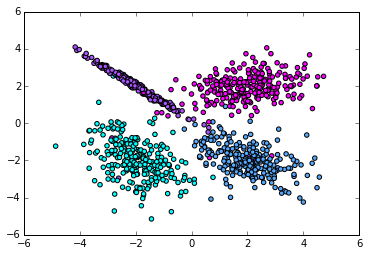

In [45]:
(easy_x, easy_y) = datasets.make_classification(n_samples=1000, n_features = 2, n_classes = 4, n_informative = 2,
                             n_redundant = 0, n_repeated = 0, n_clusters_per_class=1, class_sep=2)
scatter(easy_x[:,0], easy_x[:,1], c = easy_y, cmap = 'cool')

In [46]:
# split data into different sets
x_train = easy_x[0:500]
y_train = easy_y[0:500]
x_valid = easy_x[500:750]
y_valid = easy_y[500:750]
x_test = easy_x[750:1000]
y_test = easy_y[750:1000]

In [47]:
# training function
def train(model, criterion):
    for i in range(10):
        for j in range(x_train.shape[0]):
            prediction = model.forward(x_train[j])
            err = criterion.updateOutput(prediction, y_train[j])
            df_do = criterion.updateGradInput(prediction, y_train[j])
            grads = model.backward(df_do)

            for k,m in enumerate(model.modules):
                if m.gradWeight != ():
                    m.W -= 1e-3 * grads[k][0]
                    m.b -= 1e-3 * grads[k][1]
                    
train(model,criterion)
print "model 1 trained"
train(model2, criterion2)
print "model 2 trained"
train(model3, criterion3)
print "model 3 trained"

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
# validation
errorTotal = []
err = 0
for i in range(x_valid.shape[0]):
    prediction = model.forward(x_valid[i])
    err += criterion.updateOutput(prediction, y_valid[i])
            
errorTotal.append(err)

err = 0
for i in range(x_valid.shape[0]):
    prediction = model2.forward(x_valid[i])
    err += criterion2.updateOutput(prediction, y_valid[i])
            
errorTotal.append(err)

err = 0
for i in range(x_valid.shape[0]):
    prediction = model3.forward(x_valid[i])
    err += criterion3.updateOutput(prediction, y_valid[i])
            
errorTotal.append(err)

print errorTotal

In [ ]:
best = errorTotal.index(min(errorTotal))
if best == 0:
    print "better model is model1"
    bestM = model
elif best == 1:
    print "better model is model2"
    bestM = model2
else:
    print "better model is model3"
    bestM = model3

In [ ]:
# report testing error
err = 0
for i in range(x_test.shape[0]):
    prediction = bestM.forward(x_test[i])
    err += criterion.updateOutput(prediction, y_test[i])
    
print "total testing error for 'best' model: ", err

In [ ]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(bestM.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='autumn')

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='autumn')

In [ ]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(model.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='winter')

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='winter')

In [ ]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(model2.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='summer')

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='summer')